In [102]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import ifft, fft, fftfreq, fftshift, ifft2, fft2
from scipy.io import wavfile
from scipy.signal import hilbert
from audio_function import *

In [103]:
fs, data_2209_pgd = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1842/MIC1.WAV')
fs, data_2209_micr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1842/MIC2.WAV')
fs, data_2209_micr_calibr = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1847/MIC2.WAV')
fs, data_2209_gen = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_1003/2025_1003_1851/MIC1.WAV')
fs, data_micr_gen = wavfile.read('/Users/bogda/Desktop/Acoustics/Scientific/Исходные данные/2025_0926_1855/MIC2.WAV')

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_5957/3777591331.py:1: WavFileWarning:

Chunk (non-data) not understood, skipping it.

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_5957/3777591331.py:2: WavFileWarning:

Chunk (non-data) not understood, skipping it.

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_5957/3777591331.py:3: WavFileWarning:

Chunk (non-data) not understood, skipping it.

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_5957/3777591331.py:4: WavFileWarning:

Chunk (non-data) not understood, skipping it.

/var/folders/lf/x86pzptd3pv7z45l56wggyjc0000gn/T/ipykernel_5957/3777591331.py:5: WavFileWarning:

Chunk (non-data) not understood, skipping it.



In [104]:
octave_boundaries = np.array([71, 89, 112, 141, 179, 224, 281, 355, 447, 561, 710, 895, 1120, 1410, 1790, 2240, 2810, 3550, 4470, 5610, 7100, 8950, 11200])
lower_bounds = octave_boundaries[:-1]
upper_bounds = octave_boundaries[1:]
center_freqs = np.array([80, 100, 125, 160, 200, 250, 315, 400, 500, 630, 800, 1000, 1250, 1600, 2000, 2500, 3150, 4000, 5000, 6300, 8000, 10000])  # Центральные частоты как середина диапазона

In [105]:
# N_octave = 3
# start_freq = 100
# end_freq = 10000

# center_freqs, lower_bounds, upper_bounds = generate_octave_band_frequencies(N_octave, start_freq, end_freq)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


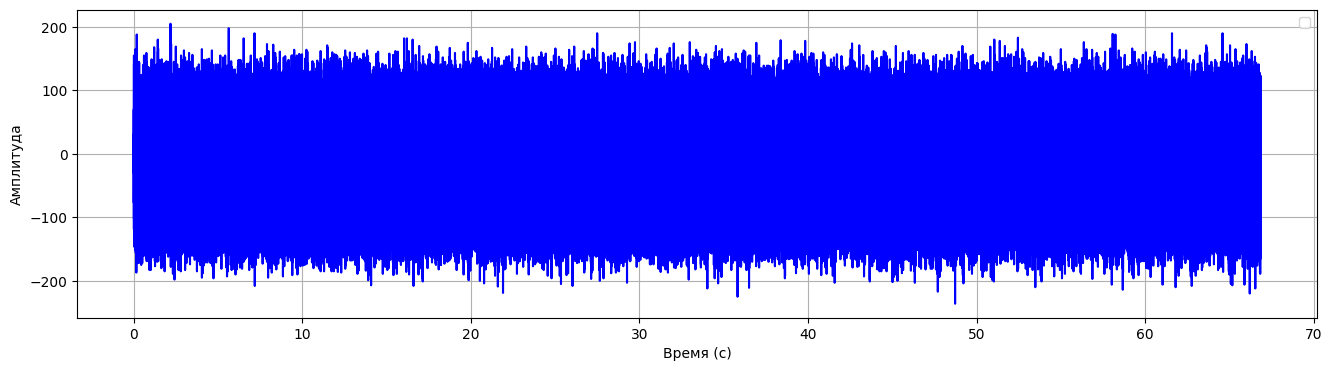

In [106]:
t_pgd = np.arange(len(data_2209_pgd))/fs
f_pgd = fftfreq(len(data_2209_pgd), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_pgd, data_2209_pgd, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


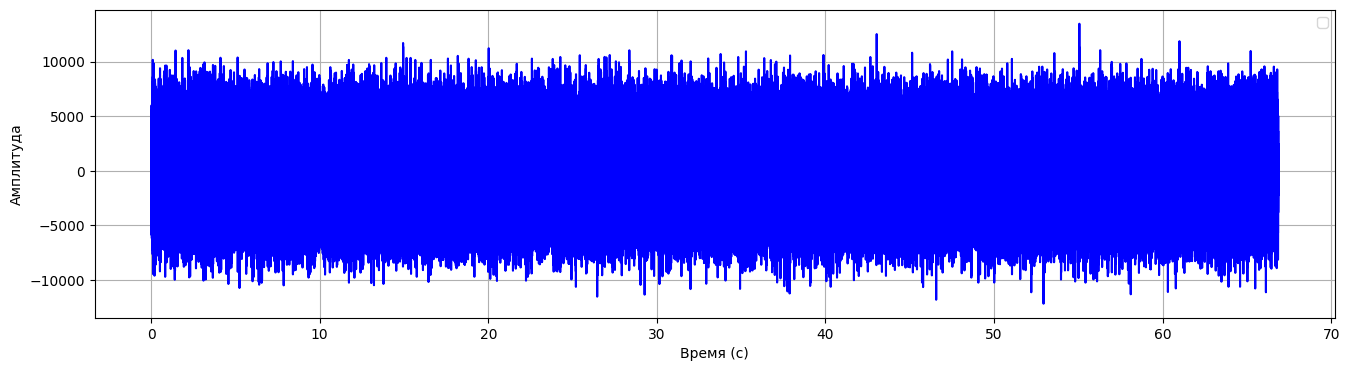

In [107]:
t_micr = np.arange(len(data_2209_micr))/fs
f_micr = fftfreq(len(data_2209_micr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr, data_2209_micr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


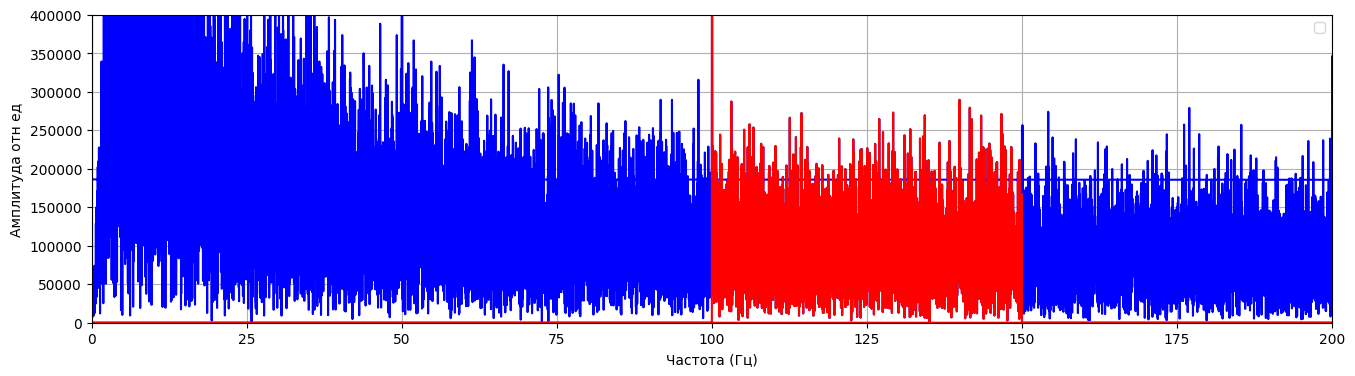

In [108]:
plt.figure(figsize=(16,4))
aaaaa = filt_freq(fft(data_2209_pgd), 100, 150, fs)
plt.plot(f_pgd, np.abs(fft(data_2209_pgd)), color='blue')
plt.plot(f_pgd, np.abs(aaaaa), color='red')
plt.legend()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда отн ед")
plt.grid(True)
plt.xlim(0, 200)
plt.ylim(0, 400000)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


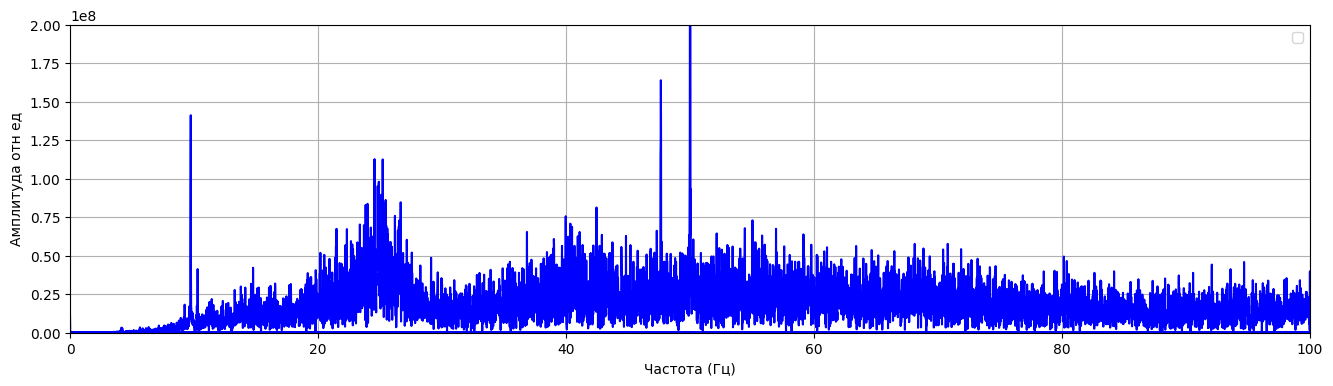

In [109]:
plt.figure(figsize=(16,4))
plt.plot(f_micr, np.abs(fft(data_2209_micr)), color='blue')
plt.legend()
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда отн ед")
plt.grid(True)
plt.xlim(0, 100)
plt.ylim(0, 2e8)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


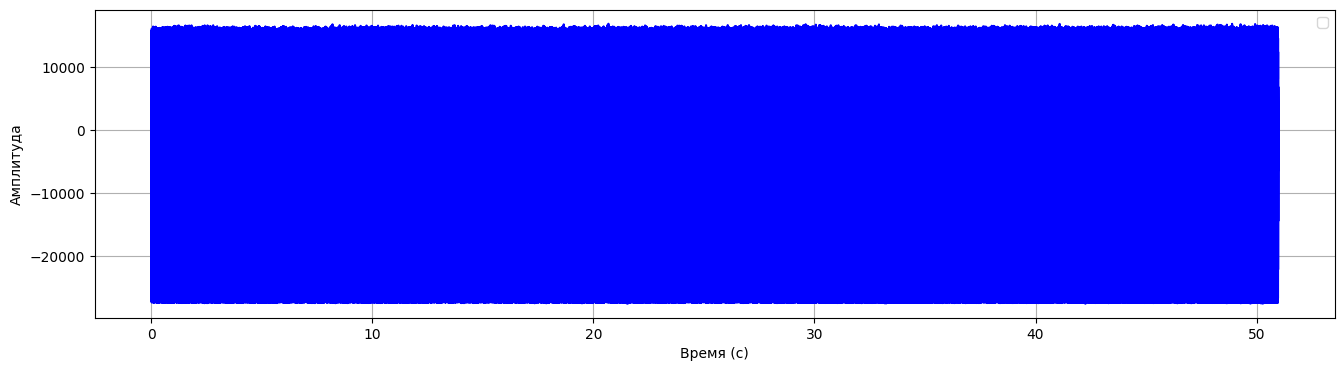

In [110]:
t_micr_calibr = np.arange(len(data_2209_micr_calibr))/fs
f_micr_calibr = fftfreq(len(data_2209_micr_calibr), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_micr_calibr, data_2209_micr_calibr, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


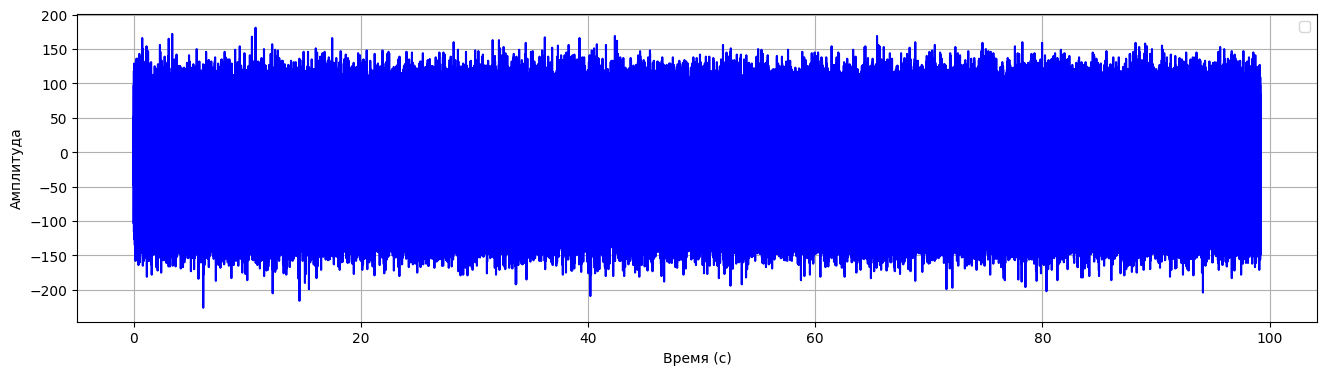

In [111]:

t_gen = np.arange(len(data_2209_gen))/fs
f_gen = fftfreq(len(data_2209_gen), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t_gen, data_2209_gen, color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.show()

In [112]:
# Выделям временной участок, на котором калибровка
t_index = (t_micr_calibr > 10) & (t_micr_calibr < 20)
t_1000Hz = t_micr_calibr[t_index]

data_2209_micr_calibr_1000Hz = data_2209_micr_calibr[t_index]

In [ ]:
# Находим коэффициент пересчета ручки усиления шумомера
data_2209_micr_calibr_1000Hz_filt = ifft(fft(data_2209_micr_calibr_1000Hz))
impl_dB = 40
k_impl = 10**(impl_dB/20)
data_2209_micr_calibr_1000Hz_filt = data_2209_micr_calibr_1000Hz_filt / k_impl
data_2209_micr = data_2209_micr / k_impl

k_t = RMS(data_2209_micr_calibr_1000Hz_filt)
k = 1 / k_t
k

0.007645928259229981

In [114]:
data_2209_micr_pa = data_2209_micr * k

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning:

Casting complex values to real discards the imaginary part

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning:

Casting complex values to real discards the imaginary part

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


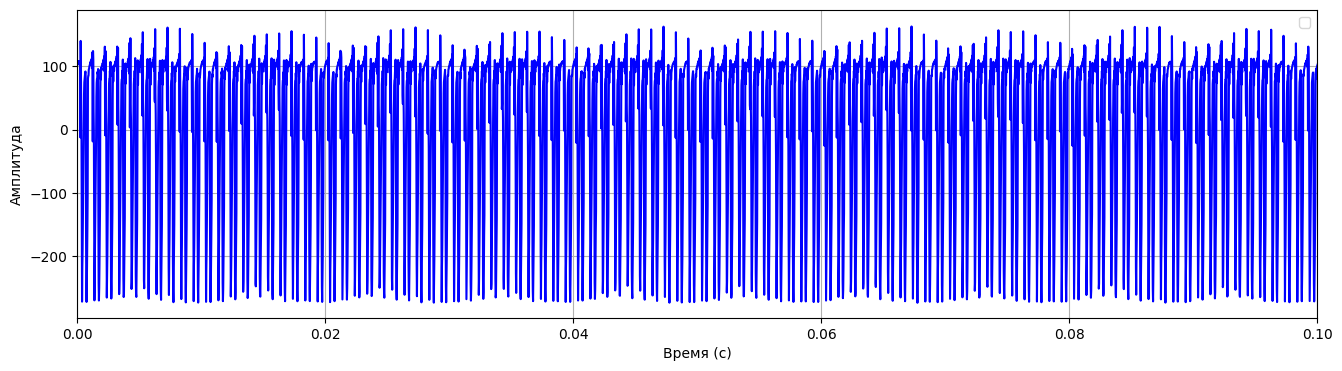

In [133]:
signal = data_2209_micr_calibr_1000Hz_filt
t = np.arange(len(signal))/fs
f = fftfreq(len(signal), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t, ((signal)), color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)
plt.xlim(0, 0.1)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


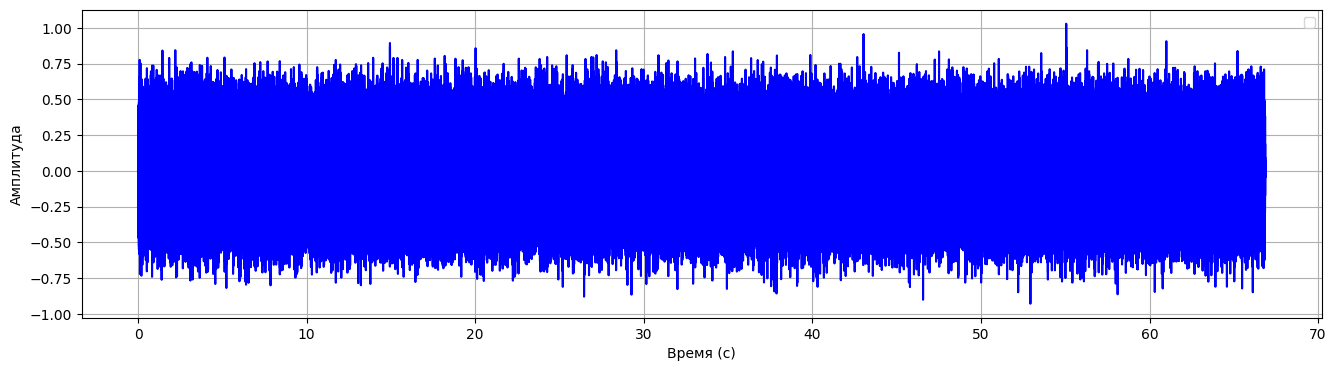

In [116]:
signal = data_2209_micr_pa
t = np.arange(len(signal))/fs
f = fftfreq(len(signal), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t, (signal), color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)

plt.show()

In [117]:
data_2209_micr_pa_rms = RMS(data_2209_micr_pa)
dB_level = 20 * np.log10(data_2209_micr_pa_rms / 2e-5)
dB_level

79.62901220679981

In [118]:
# Находим коэффициент пересчета из относительных единиц в мВ

# data_2209_gen_filt = ifft(filt_freq(fft(data_2209_gen), 995, 1005, fs))
RMS_gen = RMS(data_2209_gen)
mv_gen = 134
k_to_mv = mv_gen / RMS_gen
data_2209_pgd_mv = data_2209_pgd * k_to_mv
k_to_mv

3.220248741276432

In [119]:
RMS_micr_gen = RMS(data_micr_gen)
mv_micr_gen = 154
k_micr_to_mv = mv_micr_gen / RMS_micr_gen
data_2209_micr_pa_mv = data_2209_micr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


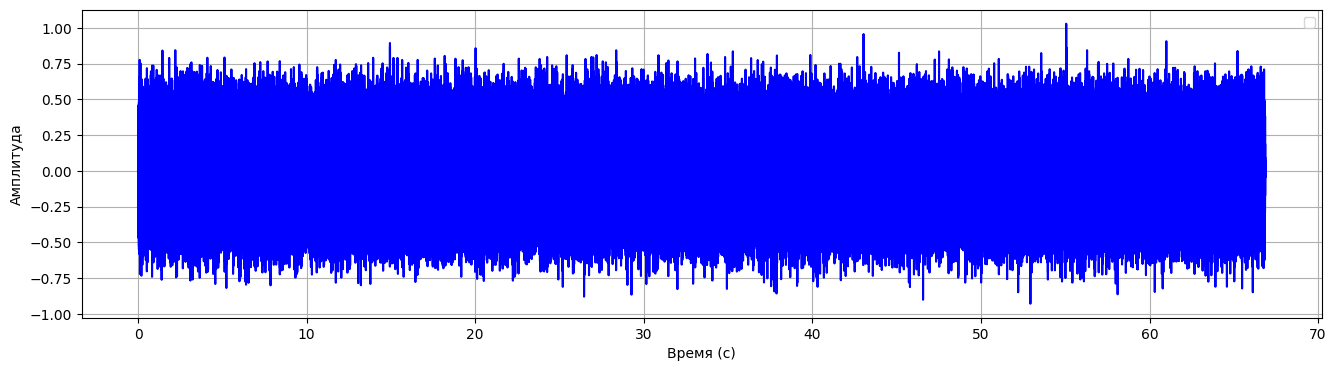

In [134]:
signal = data_2209_micr_pa
t = np.arange(len(signal))/fs
f = fftfreq(len(signal), 1 / fs)
plt.figure(figsize=(16,4))
plt.plot(t, (signal), color='blue')
plt.legend()
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.grid(True)

plt.show()

In [136]:

20 * np.log10(RMS(data_2209_micr_pa) / 2e-5)

79.62901220679981

In [121]:
# Задаем 2 массива RMS по октавным фильтрам для рассчета коэффициента чувствительности в мВ/Па

amplitudes_microphone = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_1_filt = ifft(filt_freq(fft(data_2209_micr_pa), f1, f2, fs))
    amp = RMS(data_1_filt)
    amplitudes_microphone.append(amp)

amplitudes_PGD = []
for f1, f2 in zip(lower_bounds, upper_bounds):
    data_2_filt = ifft(filt_freq(fft(data_2209_pgd_mv), f1, f2, fs))
    amp = RMS(data_2_filt)
    amplitudes_PGD.append(amp)

amplitudes_microphone = np.array(amplitudes_microphone)
amplitudes_PGD = np.array(amplitudes_PGD)
calibration_coef = amplitudes_PGD / amplitudes_microphone

In [137]:
amplitudes_microphone

array([0.02359263, 0.02322719, 0.0258841 , 0.0304694 , 0.03111724,
       0.03199993, 0.0379918 , 0.03949361, 0.03471465, 0.03765908,
       0.03946411, 0.03441428, 0.05898952, 0.05765097, 0.04797099,
       0.03717116, 0.0414016 , 0.0416996 , 0.03539279, 0.03170126,
       0.02851323, 0.01915349])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


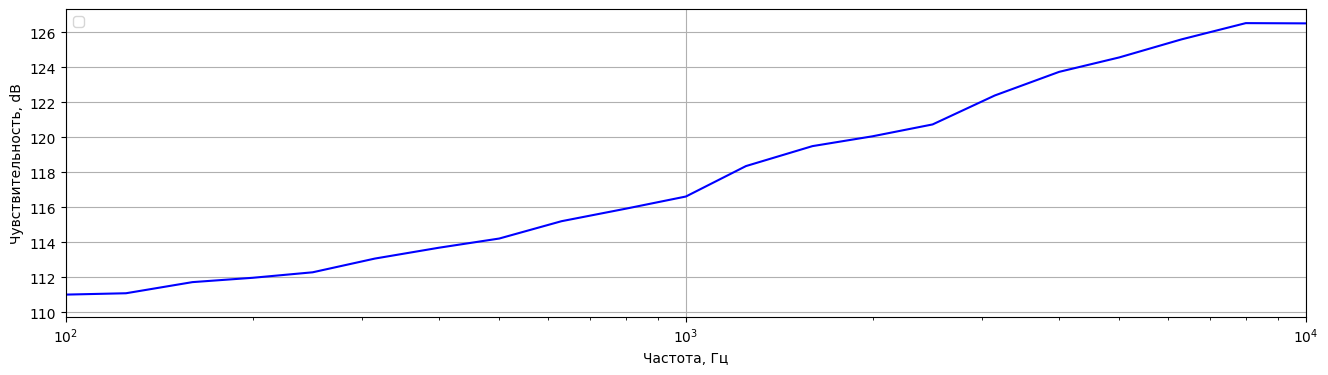

In [141]:
dB_level_calibr = 20 * np.log10(amplitudes_PGD / 2e-5)
plt.figure(figsize=(16,4))
plt.plot((center_freqs),dB_level_calibr, color='blue')
plt.legend()
plt.xlabel("Частота, Гц")
plt.ylabel("Чувствительность, dB")
plt.grid(True)
plt.xscale('log')
plt.xlim(100, 10001)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


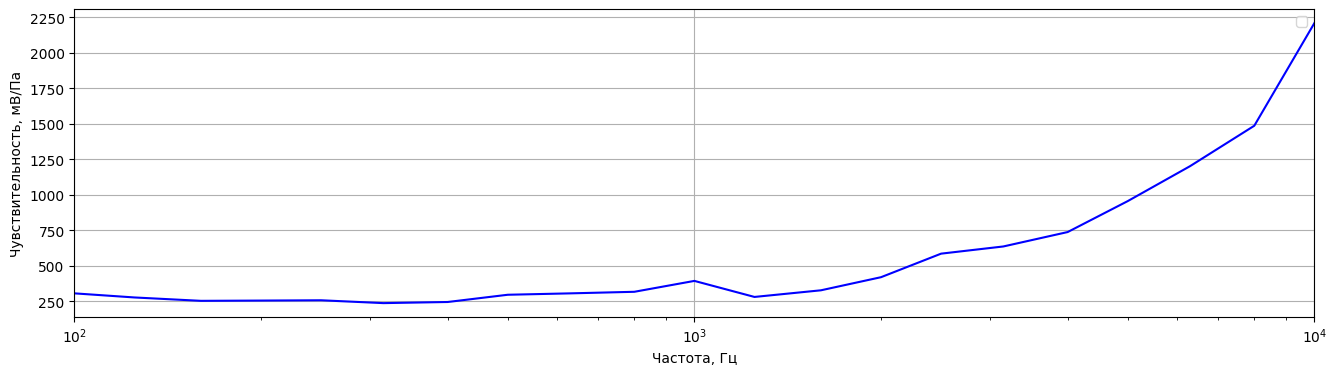

In [122]:
dB_level_calibr = 20 * np.log10(calibration_coef / 2e-5)

plt.figure(figsize=(16,4))
plt.plot((center_freqs),calibration_coef, color='blue')
plt.legend()
plt.xlabel("Частота, Гц")
plt.ylabel("Чувствительность, мВ/Па")
plt.grid(True)
plt.xscale('log')
plt.xlim(100, 10001)
plt.show()



In [ ]:
import plotly.express as px
import pandas as pd
# Пример твоих массивов X и Y
x_data = center_freqs
y_data = calibration_coef

# Создаем DataFrame
df = pd.DataFrame({
    "Частота, Гц": x_data,
    "Чувствительность, мВ/Па": y_data
})
fig = px.line(
    df,
    x = "Частота, Гц",
    y = "Чувствительность, мВ/Па",
    title = 'Интерактивный Линейный График Чувствительности Микрофона',
    log_x=True,
#    log_x=True
)

# Отображение графика
fig.show()